script for module 5. pharma analysis
 

In [5]:
# view data
mouse_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# get the unique mice
duplicates = mouse_merged[mouse_merged.duplicated(subset = ["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
print(duplicates)

['g989']


In [12]:
# all duplicate mice i.e more subseting but we can view it nicer
dupe_mouses = mouse_merged[mouse_merged["Mouse ID"].isin(duplicates)]
dupe_mouses

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# drop g989 and all other duplicate mice (if there were any but idk) for a cleaner set. 
cleaner_df = mouse_merged[mouse_merged["Mouse ID"].isin(duplicates) == False]
cleaner_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# # of mice
len(cleaner_df["Mouse ID"].unique())

248

STATS

In [15]:
# I need 
# mean
# median
#variance
# sd
# SEM
# for TUmor volume variable grouped by regime
# which honestly will be pretty easy bc that all the same code w 1 diff function. 

# then make a final datafarme w the results. 

means = cleaner_df.groupby("Drug Regimen").mean(numeric_only = True)["Tumor Volume (mm3)"]
medians= cleaner_df.groupby("Drug Regimen").median(numeric_only = True)["Tumor Volume (mm3)"]
var= cleaner_df.groupby("Drug Regimen").var(numeric_only = True)["Tumor Volume (mm3)"]
stds= cleaner_df.groupby("Drug Regimen").std(numeric_only = True)["Tumor Volume (mm3)"]
sems = cleaner_df.groupby("Drug Regimen").sem(numeric_only = True)["Tumor Volume (mm3)"]

summary_1 = pd.DataFrame({"Mean Tumor volume": means,
                              "Median Tumor volume": medians,
                              "Tumor volume variance": var,
                              "Tumor VOlume standard deviation": stds,
                              "Tumor volume standard error": sems
                             })
summary_1

,Mean Tumor volume,Median Tumor volume,Tumor volume variance,Tumor VOlume standard deviation,Tumor volume standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# make it a table using groupby

summary_1 = cleaner_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

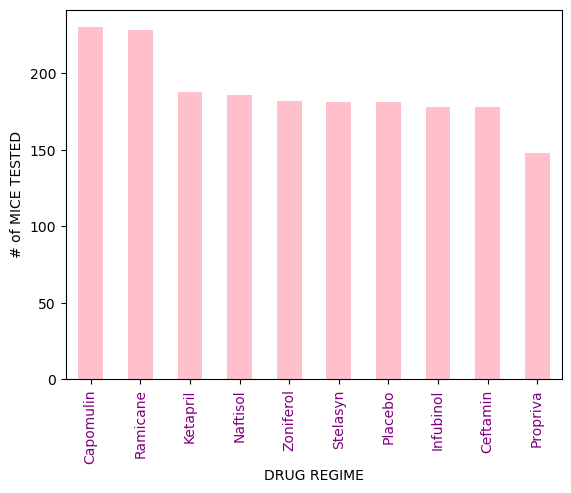

In [35]:
# use pandas to make bar chart
coutn1 = cleaner_df["Drug Regimen"].value_counts()
coutn1.plot(kind = "bar", xlabel = "DRUG REGIME", ylabel = "# of MICE TESTED", color = 'pink')
plt.xticks(color = 'purple')
plt.show()


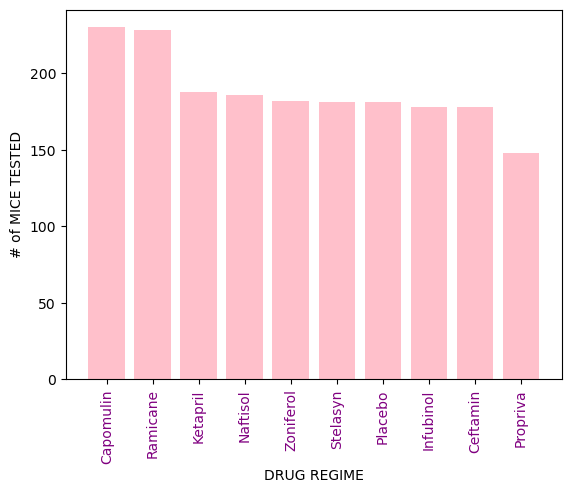

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(coutn1.index, coutn1, color = 'pink')
plt.xlabel("DRUG REGIME")
plt.ylabel("# of MICE TESTED")
plt.xticks(rotation = 90, color = 'purple')
plt.show()


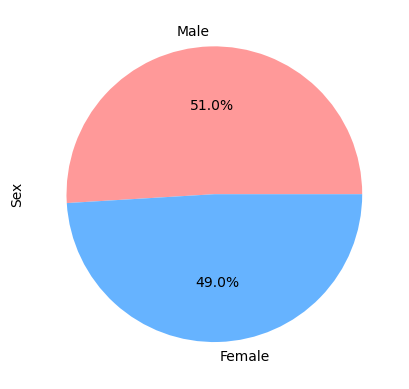

In [39]:
# pie plot of makle vs female
coutn1 = cleaner_df["Sex"].value_counts()
coutn1.plot(kind = "pie", autopct = "%.1f%%", colors = ['#ff9999', '#66b3ff'])
plt.show()

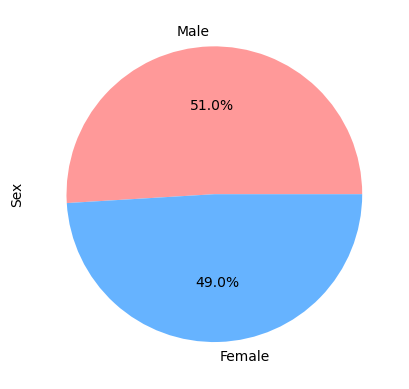

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(coutn1, labels = coutn1.index, autopct = "%.1f%%", colors = ['#ff9999', '#66b3ff'])
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# get the last mouse 
last_tumor = cleaner_df.groupby("Mouse ID").max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_merged = pd.merge(last_tumor, cleaner_df, on = ["Mouse ID", "Timepoint"], how = "left")
last_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_for_plotting = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_volume = last_merged[last_merged["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data_for_plotting.append(drug_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    

    # make IQR
    iqr = upperq - lowerq
    
    # git boiunds

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_tumor_volume[(drug_tumor_volume < lower_bound) | (drug_tumor_volume > upper_bound)]

    #print results
    print(f"{drug}'s potential outliers: {list(outliers)}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


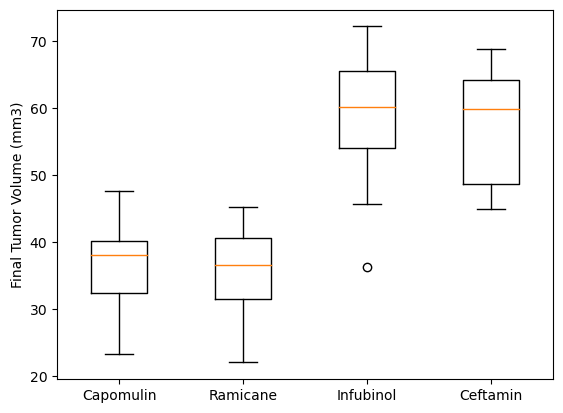

In [49]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data_for_plotting, 
            labels = treatments_list)

plt.ylabel("Final Tumor vol")

plt.show()

## Line and Scatter Plots

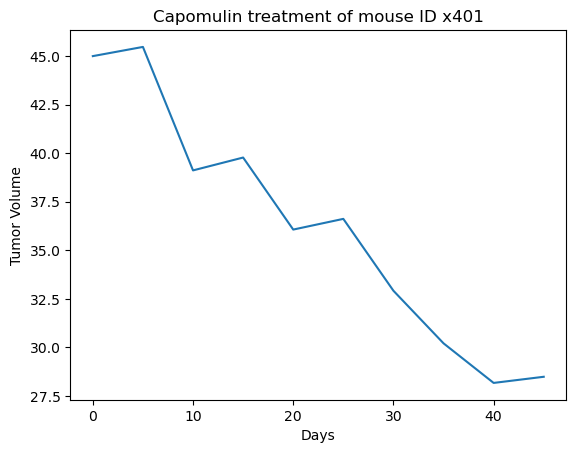

In [55]:
import random
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_table = cleaner_df[cleaner_df["Drug Regimen"] == "Capomulin"]
rand_cap = random.choice(cap_table["Mouse ID"].unique())
mousedata = cap_table[cap_table["Mouse ID"] == rand_cap]
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Volume")
plt.title(f"Capomulin treatment of mouse ID {rand_cap}")
plt.show()

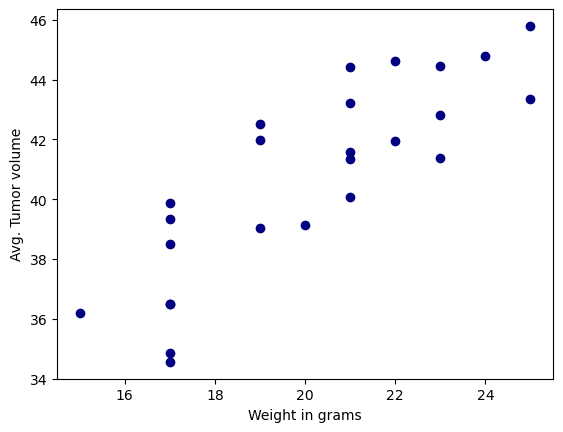

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avgs = cap_table.groupby("Mouse ID").mean(numeric_only = True)
plt.scatter(cap_avgs["Weight (g)"], cap_avgs["Tumor Volume (mm3)"], color = 'navy')
plt.xlabel("Weight in grams")
plt.ylabel("Avg. Tumor volume")
plt.show()

## Correlation and Regression

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr =round(stats.pearsonr(cap_avgs["Weight (g)"], cap_avgs["Tumor Volume (mm3)"])[0], 2)
print(corr)


0.84


The correlation between mouse weight and the average tumor volume is 0.84


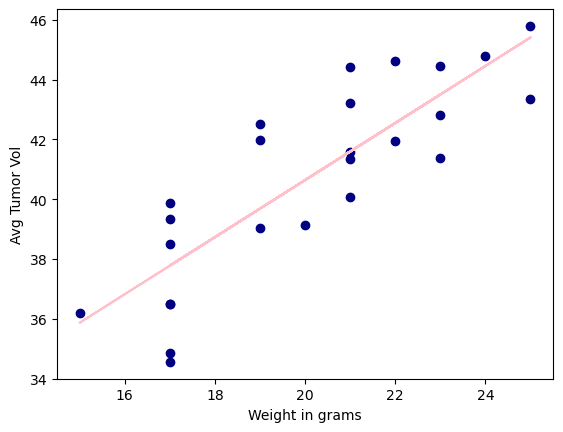

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr= round(stats.pearsonr(cap_avgs["Weight (g)"], cap_avgs["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model= stats.linregress(cap_avgs["Weight (g)"], cap_avgs["Tumor Volume (mm3)"])

y_values = cap_avgs["Weight (g)"]*model[0] + model[1]
plt.scatter(cap_avgs["Weight (g)"], cap_avgs["Tumor Volume (mm3)"], color = 'navy')
plt.plot(cap_avgs["Weight (g)"], y_values, color = "pink")
plt.xlabel("Weight in grams")
plt.ylabel("Avg Tumor Vol")
plt.show()